In [1]:
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 평가표표
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # 백분율로 변환


In [5]:
data = pd.read_excel("mlb_dp_20.xlsx")
data.head()

,Unnamed: 0,id,ball_type,pitch_type,velocity,exit_velocity,hit_dist,zone_num,pitcher_hand,batter_hand,...,temp,wind,rain,theta_p,theta_n,distance,player_age,slg_percent,isolated_power,babip
0,0,676356,0,2,91.2,88.5,3,14,0,0,...,23.0,0.0,0,115.306158,-25.306158,91.654771,24,0.429,0.167,0.281
1,1,676356,1,2,86.3,105.0,228,9,0,0,...,21.3,11.6,0,103.751442,-13.751442,189.305002,24,0.429,0.167,0.281
2,2,676356,0,1,95.7,91.9,100,8,0,0,...,23.0,0.0,0,41.540762,48.459238,96.804764,24,0.429,0.167,0.281
3,3,676356,0,5,83.3,80.7,208,6,0,0,...,23.0,0.0,0,91.562115,-1.562115,168.446016,24,0.429,0.167,0.281
4,4,676356,0,2,91.2,88.5,3,14,0,0,...,23.0,0.0,0,116.408340,-26.408340,92.322138,24,0.429,0.167,0.281


In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
X = data.drop(columns=["theta_p", "theta_n", "distance"])
y = data[["theta_p", "distance"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
import pickle

In [18]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 10.7 MB/s eta 0:00:00


In [15]:
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor

# 모델 불러와서 학습 및 예측 & 특정 선수 타구 위치 확인

In [17]:
lgbm_model_path = 'lgbm_2.pkl'
lgbm_model = pickle.load(open(lgbm_model_path, "rb"))
lgbm_model.get_params

<bound method LGBMModel.get_params of LGBMRegressor(colsample_bytree=0.9240682569519426,
              learning_rate=0.06829996479614221, max_depth=10,
              min_child_samples=18, n_estimators=2309, num_leaves=80,
              subsample=0.8003143822554627)>

In [19]:
lgbm_model = MultiOutputRegressor(lgbm_model)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print("lightGBM RMSE : ", rmse(y_test, y_pred))
print("lightGBM MAPE : ", mape(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2219
[LightGBM] [Info] Number of data points in the train set: 87976, number of used features: 19
[LightGBM] [Info] Start training from score 92.014227
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [21]:
X_test

,id,ball_type,pitch_type,velocity,exit_velocity,hit_dist,zone_num,pitcher_hand,batter_hand,ball,strike,place,temp,wind,rain,player_age,slg_percent,isolated_power,babip
11221,687462,0,1,95.8,84.2,65,6,0,1,0,2,6,23.0,0.0,0,25,0.385,0.129,0.346
23379,605131,1,3,83.4,100.0,262,1,0,0,2,2,11,18.0,10.8,0,33,0.242,0.062,0.222
74319,646240,2,4,88.2,104.9,397,13,0,1,0,0,17,19.7,14.8,0,26,0.500,0.229,0.292
37024,650859,0,3,90.6,88.7,3,4,0,1,1,1,13,16.4,18.7,0,26,0.444,0.180,0.293
69936,665506,0,0,98.1,67.0,193,4,1,0,1,0,26,29.7,14.4,0,24,0.417,0.179,0.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95760,668670,0,4,86.8,52.7,1,12,0,0,0,1,22,21.7,11.7,3,28,0.444,0.223,0.268
24545,656811,1,2,85.0,49.9,2,9,1,1,0,0,22,27.4,12.8,1,29,0.480,0.191,0.340
88114,608324,0,3,88.8,93.1,338,9,0,0,0,0,29,23.0,0.0,0,29,0.441,0.179,0.270
13099,664040,0,1,91.6,78.1,28,6,0,1,3,2,19,21.3,11.6,0,28,0.443,0.212,0.275


In [23]:
y_test

,theta_p,distance
11221,60.217684,114.506048
23379,128.887317,217.864649
74319,88.067333,333.457492
37024,72.286101,102.800598
69936,68.869219,156.107916
...,...,...
95760,99.049573,21.574398
24545,112.148267,40.564939
88114,108.572898,281.585445
13099,44.492060,105.773361


In [25]:
y_pred

array([[ 85.60234067, 113.58617076],
       [117.89680024, 215.72638896],
       [ 93.03894449, 331.09449325],
       ...,
       [ 86.80600302, 282.93773649],
       [ 54.30958572,  97.460883  ],
       [ 88.63606463, 114.63243965]])

In [59]:
# 데이터 결합
result = X_test[["id"]].copy()  # id 컬럼만 추출
result["theta_p_test"] = y_test["theta_p"]
result["distance_test"] = y_test["distance"]
result["theta_p_pred"] = y_pred[:, 0]
result["distance_pred"] = y_pred[:, 1]

# 결과 출력 -> 새로운 df 생성
result

,id,theta_p_test,distance_test,theta_p_pred,distance_pred
11221,687462,60.217684,114.506048,85.602341,113.586171
23379,605131,128.887317,217.864649,117.896800,215.726389
74319,646240,88.067333,333.457492,93.038944,331.094493
37024,650859,72.286101,102.800598,79.562861,97.902231
69936,665506,68.869219,156.107916,78.273746,153.651079
...,...,...,...,...,...
95760,668670,99.049573,21.574398,117.549456,28.862257
24545,656811,112.148267,40.564939,118.113955,39.642891
88114,608324,108.572898,281.585445,86.806003,282.937736
13099,664040,44.492060,105.773361,54.309586,97.460883


In [191]:
# 특정 선수 id
Ohtani = 660271
Kim = 673490
Judge = 592450

In [293]:
# test theta
theta_test = list(result.loc[result["id"]==Judge, "theta_p_test"])

In [295]:
# test distance
distance_test = list(result.loc[result["id"]==Judge, "distance_test"])

In [297]:
# predicted theta
theta_pred = list(result.loc[result["id"]==Judge, "theta_p_pred"])

In [299]:
# predicted distance
distance_pred = list(result.loc[result["id"]==Judge, "distance_pred"])

왼쪽 : 실제 공 위치, 오른쪽 : 예측 공 위치

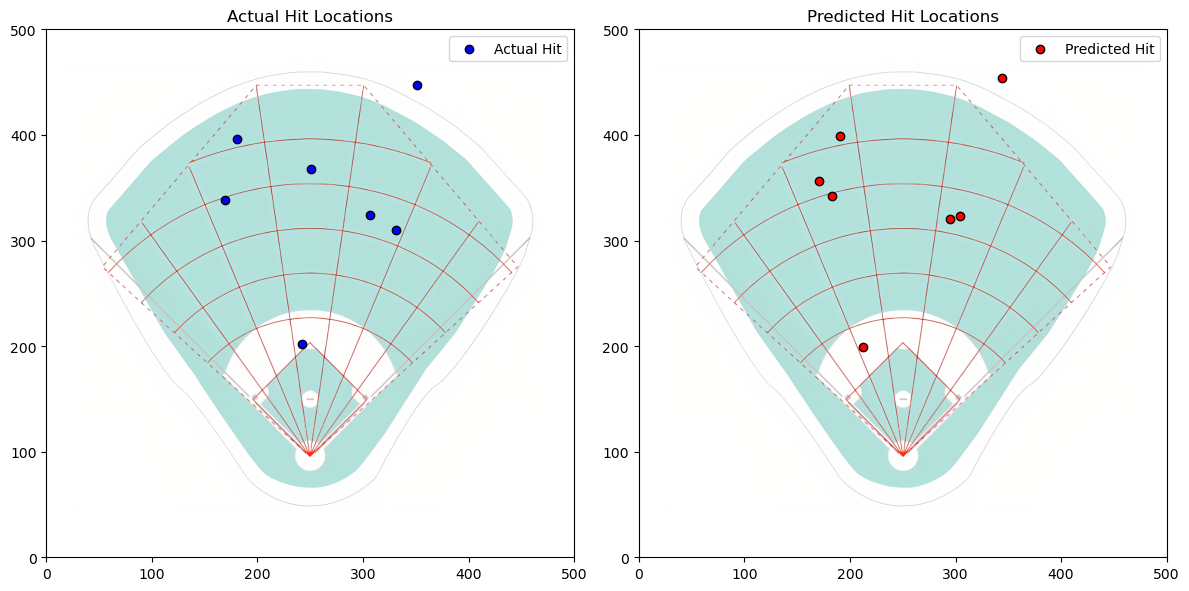

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 홈플레이트 기준 좌표
home_x, home_y = 250, 400

import numpy as np


# 극좌표(theta, distance)를 직교좌표(cx, cy)로 변환하는 함수
def polar_to_cartesian(theta_list, distance_list):
    if not theta_list or not distance_list:
        print("🚨 theta_list 또는 distance_list가 비어 있습니다!")
        return [], []

    theta_rad = np.radians(theta_list)  # degrees → radians 변환
    cx_list = home_x + np.array(distance_list) * np.cos(theta_rad)
    cy_list = 500 - home_y + np.array(distance_list) * np.sin(theta_rad)


    return cx_list, cy_list



# 데이터 변환
cx_test, cy_test = polar_to_cartesian(theta_test, distance_test)
cx_pred, cy_pred = polar_to_cartesian(theta_pred, distance_pred)
# print((cx_test))
cx_test = cx_test[:7]
cy_test = cy_test[:7]
cx_pred = cx_pred[:7]
cy_pred = cy_pred[:7]

# 이미지 로드
image_path = "타구구역.png"
img = mpimg.imread(image_path)

# 플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 왼쪽 플롯: 실제 타구 위치
axes[0].imshow(img, extent=[0, 500, 0, 500])  # 이미지 크기에 맞게 설정
axes[0].scatter(cx_test, cy_test, color='blue', label='Actual Hit', edgecolors='black')
axes[0].set_title("Actual Hit Locations")
axes[0].set_xlim(0, 500)
axes[0].set_ylim(0,500)
axes[0].legend()

# 오른쪽 플롯: 예측된 타구 위치
axes[1].imshow(img, extent=[0, 500, 0, 500])  # 이미지 크기에 맞게 설정
axes[1].scatter(cx_pred, cy_pred, color='red', label='Predicted Hit', edgecolors='black')
axes[1].set_title("Predicted Hit Locations")
axes[1].set_xlim(0, 500)
axes[1].set_ylim(0, 500)
axes[1].legend()

# 화면에 표시
plt.tight_layout()
plt.show()


1개 플롯에 실제값 vs 예측값 비교

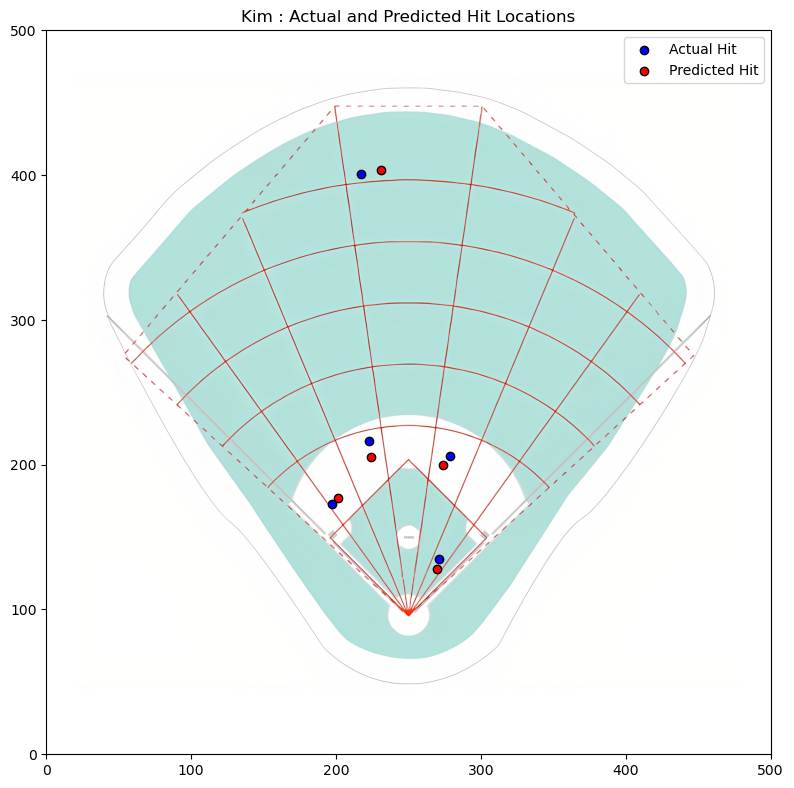

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 홈플레이트 기준 좌표
home_x, home_y = 250, 400

# 극좌표(theta, distance)를 직교좌표(cx, cy)로 변환하는 함수
def polar_to_cartesian(theta_list, distance_list):
    if not theta_list or not distance_list:
        print("🚨 theta_list 또는 distance_list가 비어 있습니다!")
        return [], []

    theta_rad = np.radians(theta_list)  # degrees → radians 변환
    cx_list = home_x + np.array(distance_list) * np.cos(theta_rad)
    cy_list = 500 - home_y + np.array(distance_list) * np.sin(theta_rad)

    return cx_list, cy_list

# 데이터 변환
cx_test, cy_test = polar_to_cartesian(theta_test, distance_test)
cx_pred, cy_pred = polar_to_cartesian(theta_pred, distance_pred)

# 데이터 잘라내기 -> 타구위치 5개만 가져오기
cx_test = cx_test[:5]
cy_test = cy_test[:5]
cx_pred = cx_pred[:5]
cy_pred = cy_pred[:5]


# 이미지 로드
image_path = "타구구역.png"
img = mpimg.imread(image_path)

# 플롯 생성
fig, ax = plt.subplots(figsize=(8, 8))

# 이미지 표시
ax.imshow(img, extent=[0, 500, 0, 500])  # 이미지 크기에 맞게 설정

# 실제 값과 예측 값 scatter
ax.scatter(cx_test, cy_test, color='blue', label='Actual Hit', edgecolors='black')
ax.scatter(cx_pred, cy_pred, color='red', label='Predicted Hit', edgecolors='black')

# 타이틀과 레이블 설정
ax.set_title("Kim : Actual and Predicted Hit Locations")
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
ax.legend()


# 화면에 표시
plt.tight_layout()
plt.show()


실제값과 예측값 거리 구하기

Point 1 Distance: 94.41
Point 2 Distance: 4.80
Point 3 Distance: 115.60
Point 4 Distance: 14.71
Point 5 Distance: 18.94


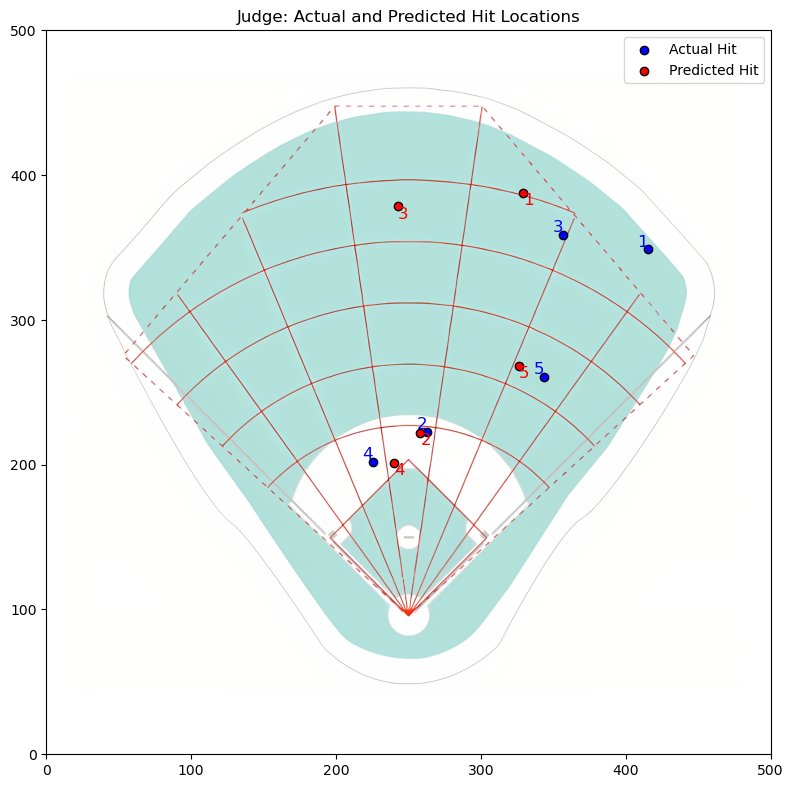

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 홈플레이트 기준 좌표
home_x, home_y = 250, 400

# 극좌표(theta, distance)를 직교좌표(cx, cy)로 변환하는 함수
def polar_to_cartesian(theta_list, distance_list):
    if not theta_list or not distance_list:
        print("🚨 theta_list 또는 distance_list가 비어 있습니다!")
        return [], []

    theta_rad = np.radians(theta_list)  # degrees → radians 변환
    cx_list = home_x + np.array(distance_list) * np.cos(theta_rad)
    cy_list = 500 - home_y + np.array(distance_list) * np.sin(theta_rad)

    return cx_list, cy_list

# 데이터 변환
cx_test, cy_test = polar_to_cartesian(theta_test, distance_test)
cx_pred, cy_pred = polar_to_cartesian(theta_pred, distance_pred)

# 데이터 잘라내기 (5개씩)
cx_test = cx_test[:5]
cy_test = cy_test[:5]
cx_pred = cx_pred[:5]
cy_pred = cy_pred[:5]

# 거리 계산 (유클리드 거리)
distances = np.sqrt((cx_test - cx_pred) ** 2 + (cy_test - cy_pred) ** 2)

# 거리 출력
for i, d in enumerate(distances):
    print(f"Point {i+1} Distance: {d:.2f}")

# 이미지 로드
image_path = "타구구역.png"
img = mpimg.imread(image_path)

# 플롯 생성
fig, ax = plt.subplots(figsize=(8, 8))

# 이미지 표시
ax.imshow(img, extent=[0, 500, 0, 500])

# 실제 값과 예측 값 scatter
for i, (x_t, y_t, x_p, y_p) in enumerate(zip(cx_test, cy_test, cx_pred, cy_pred)):
    ax.scatter(x_t, y_t, color='blue', edgecolors='black', label='Actual Hit' if i == 0 else "")
    ax.scatter(x_p, y_p, color='red', edgecolors='black', label='Predicted Hit' if i == 0 else "")
    ax.text(x_t, y_t, f"{i+1}", fontsize=12, color="blue", ha="right", va="bottom")
    ax.text(x_p, y_p, f"{i+1}", fontsize=12, color="red", ha="left", va="top")

# 타이틀과 레이블 설정
ax.set_title("Judge: Actual and Predicted Hit Locations")
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
ax.legend()

# 화면에 표시
plt.tight_layout()
plt.show()


# 추가) 예측값 vs 실제값 비교

HPT 전

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# 1차: Train(80%) + Test(20%) 분할
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2차: Train(60%) + Validation(20%) 분할 (Train+Validation을 다시 나눔)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [66]:
lgbm_base_model = LGBMRegressor(random_state=1234, n_jobs=-1)
lgbm_base_model = MultiOutputRegressor(lgbm_base_model)
lgbm_base_model.fit(X_train, y_train)
y_val_pred = lgbm_base_model.predict(X_val)
print("lightGBM RMSE : ", rmse(y_val, y_val_pred))
print("lightGBM MAPE : ", mape(y_val, y_val_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2219
[LightGBM] [Info] Number of data points in the train set: 65982, number of used features: 19
[LightGBM] [Info] Start training from score 92.126346
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2219
[LightGBM] [Info] Number of data points in the train set: 65982, number of used features: 19
[LightGBM] [Info] Start training from score 166.550683
lightGBM RMSE :  22.799146732105346
lightGBM MAPE :  26.100149835495863


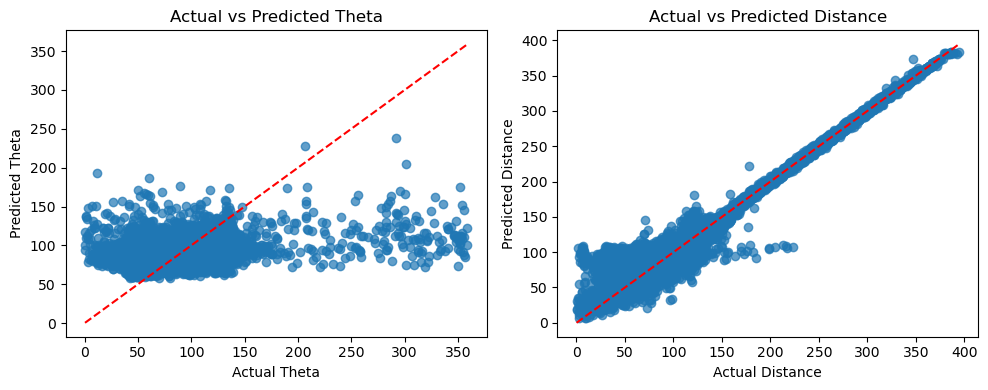

In [68]:
# Theta 예측값 vs 실제값
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_val["theta_p"], y_val_pred[:, 0], alpha=0.7)
plt.plot([min(y_val["theta_p"]), max(y_val["theta_p"])], [min(y_val["theta_p"]), max(y_val["theta_p"])], color='red', linestyle='--')
plt.xlabel("Actual Theta")
plt.ylabel("Predicted Theta")
plt.title("Actual vs Predicted Theta")

# Distance 예측값 vs 실제값
plt.subplot(1, 2, 2)
plt.scatter(y_val["distance"], y_val_pred[:, 1], alpha=0.7)
plt.plot([min(y_val["distance"]), max(y_val["distance"])], [min(y_val["distance"]), max(y_val["distance"])], color='red', linestyle='--')
plt.xlabel("Actual Distance")
plt.ylabel("Predicted Distance")
plt.title("Actual vs Predicted Distance")

plt.tight_layout()
plt.show()

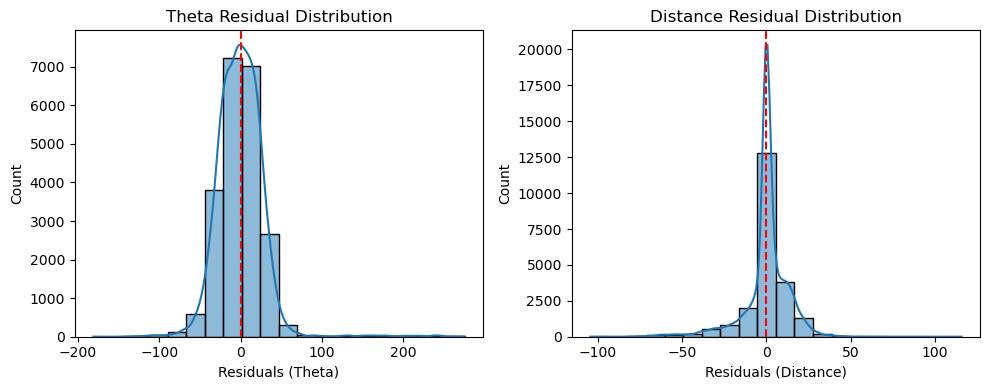

In [70]:
# 잔차 계산
residuals_theta = y_val["theta_p"] - y_val_pred[:, 0]
residuals_distance = y_val["distance"] - y_val_pred[:, 1]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(residuals_theta, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Theta)")
plt.title("Theta Residual Distribution")

plt.subplot(1, 2, 2)
sns.histplot(residuals_distance, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Distance)")
plt.title("Distance Residual Distribution")

plt.tight_layout()
plt.show()

HPT 후

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

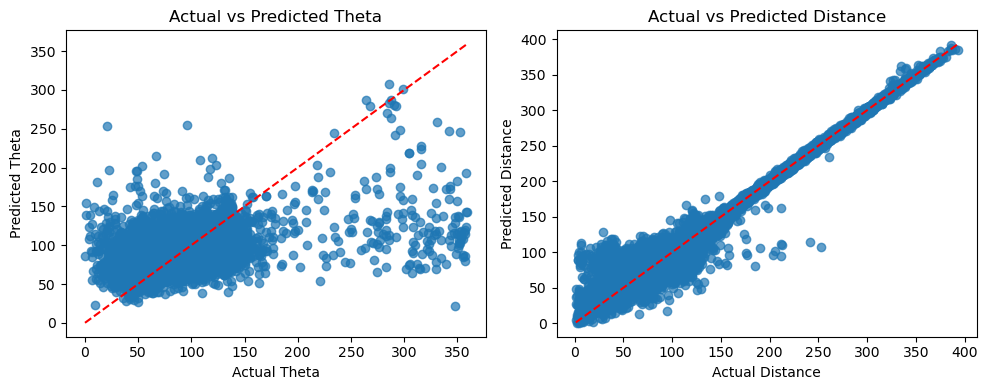

In [46]:
# Theta 예측값 vs 실제값
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test["theta_p"], y_pred[:, 0], alpha=0.7)
plt.plot([min(y_test["theta_p"]), max(y_test["theta_p"])], [min(y_test["theta_p"]), max(y_test["theta_p"])], color='red', linestyle='--')
plt.xlabel("Actual Theta")
plt.ylabel("Predicted Theta")
plt.title("Actual vs Predicted Theta")

# Distance 예측값 vs 실제값
plt.subplot(1, 2, 2)
plt.scatter(y_test["distance"], y_pred[:, 1], alpha=0.7)
plt.plot([min(y_test["distance"]), max(y_test["distance"])], [min(y_test["distance"]), max(y_test["distance"])], color='red', linestyle='--')
plt.xlabel("Actual Distance")
plt.ylabel("Predicted Distance")
plt.title("Actual vs Predicted Distance")

plt.tight_layout()
plt.show()

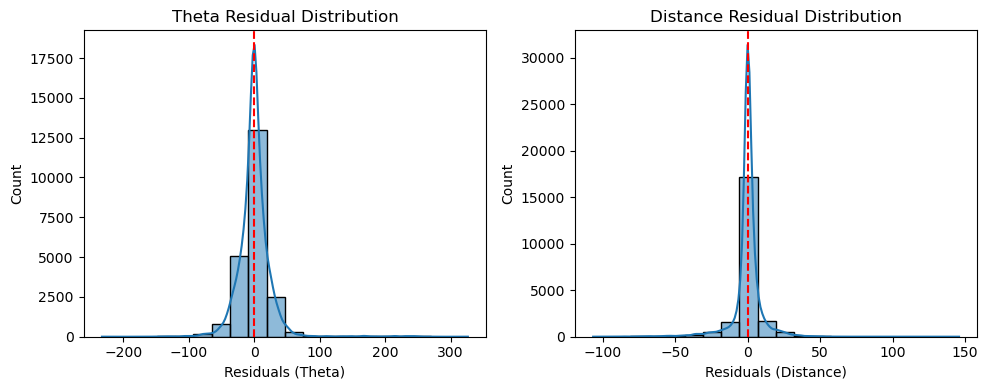

In [52]:
# 잔차 계산
residuals_theta = y_test["theta_p"] - y_pred[:, 0]
residuals_distance = y_test["distance"] - y_pred[:, 1]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(residuals_theta, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Theta)")
plt.title("Theta Residual Distribution")

plt.subplot(1, 2, 2)
sns.histplot(residuals_distance, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Distance)")
plt.title("Distance Residual Distribution")

plt.tight_layout()
plt.show()